In [1]:
# Libraries 
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt 
import datetime as dt
import scipy.stats as stats
import statsmodels.api as sm
import statsmodels.stats.api as sms
import statsmodels.formula.api as smf
import statsmodels.stats.multicomp as smm
import copy as cp
import importlib
import statsmodels.stats.outliers_influence as sso

import self_defined_functions as ft
import seaborn as sns

from matplotlib.ticker import FuncFormatter
plt.rcParams['font.sans-serif'] = ['Taipei Sans TC Beta']

In [2]:
ft.gen_ANOVA_xlsx()

In [3]:
df_all = pd.read_excel( 'ANOVA_df.xlsx' )

In [4]:
df_5 = df_all['trans_cnt']

In [5]:
df_5 = pd.concat( [df_5, df_all['date']], axis = 1 )
df_5 = pd.concat( [df_5, df_all['year']], axis = 1 )
df_5 = pd.concat( [df_5, df_all['month']], axis = 1 )
df_5 = pd.concat( [df_5, df_all['day']], axis = 1 )

In [6]:
dummy = pd.get_dummies( df_all['weekday'], prefix = 'weekday' )
df_5 = pd.concat( [df_5, dummy], axis = 1 )
del df_5["weekday_6"]

In [7]:
dummy = pd.get_dummies( df_all['belong'], prefix = 'belong' )
df_5 = pd.concat( [df_5, dummy], axis = 1 )
del df_5["belong_weekend"]

In [8]:
dummy = pd.get_dummies( df_all['phase'], prefix = 'phase' )
df_5 = pd.concat( [df_5, dummy], axis = 1 )
del df_5["phase_mid"]

In [9]:
df_5_to_pre = df_5[df_5['year'] >= 2020]


In [10]:
df_5 = df_5[df_5['year'] < 2020]

In [11]:
y_data = df_5.iloc[:,:1] # If yvalue is in the fisrt column
x_data = sm.add_constant( df_5.iloc[:,2:] ) # If yvalue is in the fisrt column
olsmod = sm.OLS( y_data, x_data )
result_reg = olsmod.fit()
print( result_reg.summary() )

                            OLS Regression Results                            
Dep. Variable:              trans_cnt   R-squared:                       0.749
Model:                            OLS   Adj. R-squared:                  0.748
Method:                 Least Squares   F-statistic:                     1088.
Date:                Mon, 23 May 2022   Prob (F-statistic):               0.00
Time:                        13:43:33   Log-Likelihood:                -67983.
No. Observations:                5478   AIC:                         1.360e+05
Df Residuals:                    5462   BIC:                         1.361e+05
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const              -3.632e+07   3.74

In [12]:
df_all[df_all['year'] >= 2020]['date']

5478   2020-01-01
5479   2020-01-02
5480   2020-01-03
5481   2020-01-04
5482   2020-01-05
          ...    
6325   2022-04-27
6326   2022-04-28
6327   2022-04-29
6328   2022-04-30
6329   2022-05-01
Name: date, Length: 852, dtype: datetime64[ns]

In [13]:
pre = result_reg.predict( sm.add_constant( df_5_to_pre.iloc[:,2:] ))
df_5_to_pre = pd.concat( [df_5_to_pre, pre], axis = 1, names = ['Predict'] )

In [14]:
df_5_to_pre

,trans_cnt,date,year,month,day,weekday_0,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,belong_National,belong_None,belong_Traditional,phase_None,phase_end,phase_start,0
5478,689759,2020-01-01,2020,1,1,0,0,1,0,0,0,1,0,0,1,0,0,717247.199157
5479,605313,2020-01-02,2020,1,2,0,0,0,1,0,0,0,1,0,1,0,0,633456.243496
5480,694980,2020-01-03,2020,1,3,0,0,0,0,1,0,0,0,0,0,0,1,766641.612317
5481,638517,2020-01-04,2020,1,4,0,0,0,0,0,1,0,0,0,0,0,0,724428.583091
5482,653592,2020-01-05,2020,1,5,0,0,0,0,0,0,0,0,0,0,1,0,767932.230501
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6325,375156,2022-04-27,2022,4,27,0,0,1,0,0,0,0,1,0,1,0,0,672199.274378
6326,377599,2022-04-28,2022,4,28,0,0,0,1,0,0,0,1,0,1,0,0,678305.707790
6327,475282,2022-04-29,2022,4,29,0,0,0,0,1,0,0,1,0,1,0,0,696968.517503
6328,325490,2022-04-30,2022,4,30,0,0,0,0,0,1,0,1,0,1,0,0,646493.312222


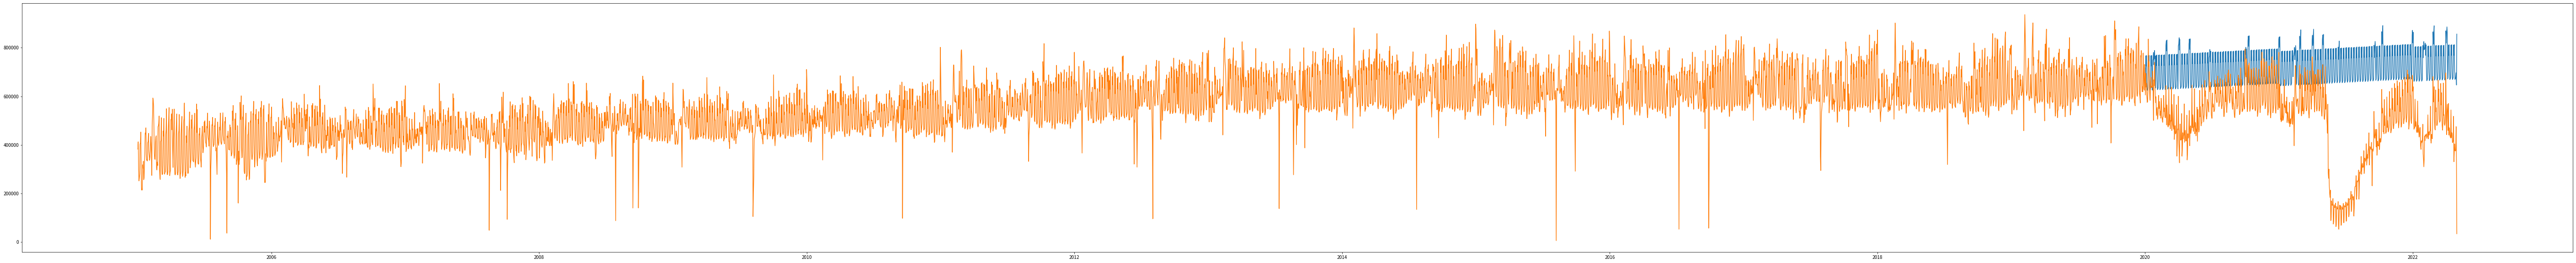

In [15]:
fig, ax = plt.subplots( figsize = ( 100, 10 ) )
plt.plot( df_5_to_pre['date'], df_5_to_pre.iloc[:,-1])
plt.plot( df_all['date'], df_all['trans_cnt'])
plt.savefig( 'temp.jpg')

In [16]:
st, data, ss2 = sso.summary_table( result_reg, alpha=0.05 )
print( "Columns in data are: %s" % ss2 )
# Studentized Residual
SD = data[:, 10]

Columns in data are: ['Obs', 'Dep Var\nPopulation', 'Predicted\nValue', 'Std Error\nMean Predict', 'Mean ci\n95% low', 'Mean ci\n95% upp', 'Predict ci\n95% low', 'Predict ci\n95% upp', 'Residual', 'Std Error\nResidual', 'Student\nResidual', "Cook's\nD"]


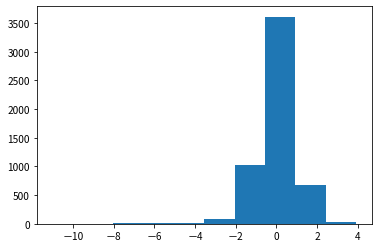

In [17]:
_ = plt.hist( SD )

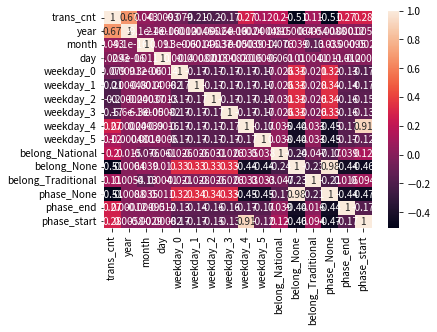

In [18]:
corr_1_3 = df_5.corr()
_ = sns.heatmap(corr_1_3, annot=True)

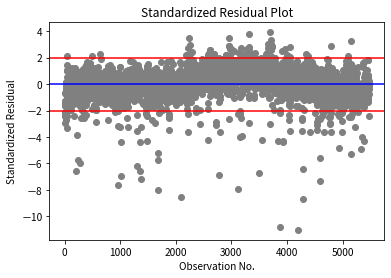

In [19]:
ID = df_5.index
plt.plot(ID , SD, 'o', color = 'gray')
plt.axhline(y=0, color = 'blue')
plt.axhline(y=2, color = 'red')
plt.axhline(y=-2, color = 'red')
plt.title('Standardized Residual Plot')
plt.xlabel('Observation No.')
plt.ylabel('Standardized Residual')
plt.show()

In [20]:
def Durbin_Watson_test(x):
    x_square_sum = np.vdot(x, x)
    print("x_square_sum = ", x_square_sum)
    size = x.size
    print("size = ", size)
    x_d = np.zeros((size))
    print("x_d = ", x_d)
    l_size = size - 1
    for i in range(l_size):
        x_d[i + 1] = x[i + 1] - x[i]
    print("x_d = ", x_d)
    d = np.vdot(x_d, x_d) / x_square_sum
    print("d = ", d)
    return(d)

In [21]:
d_w = Durbin_Watson_test( SD )
print(d_w)

x_square_sum =  5483.87796028298
size =  5478
x_d =  [0. 0. 0. ... 0. 0. 0.]
x_d =  [ 0.         -0.22801791  0.88345806 ... -2.18982646  1.70127416
  0.86269008]
d =  0.855383878161767
0.855383878161767


In [22]:
stats.shapiro( SD )

c:\Users\PuSung\AppData\Local\Programs\Python\Python310\lib\site-packages\scipy\stats\_morestats.py:1761: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


ShapiroResult(statistic=0.8850547075271606, pvalue=0.0)

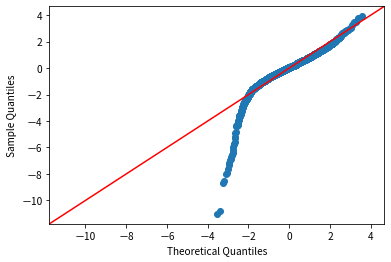

In [23]:
fig = sm.qqplot( SD, stats.norm, fit=True, line = '45' ) 

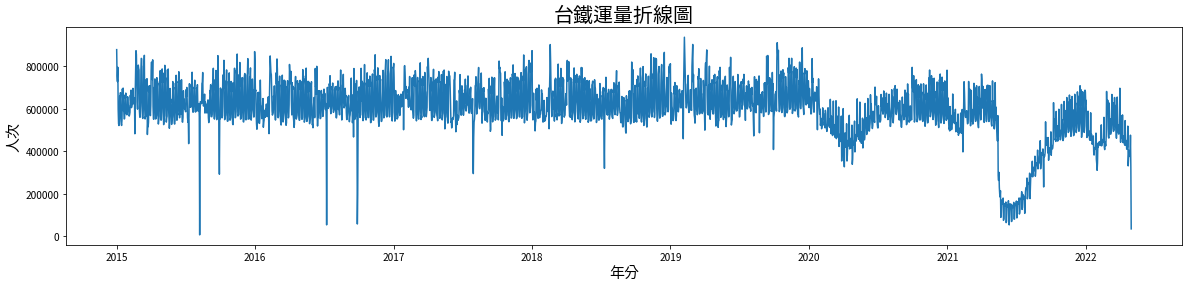

In [24]:
df_all = pd.read_excel( 'ANOVA_df.xlsx' )
df_all = df_all[df_all['year'] > 2014]

fig, ax = plt.subplots( figsize = ( 20, 4 ) )
ax.plot( df_all['date'], df_all['trans_cnt'] )
plt.title( '台鐵運量折線圖', fontsize = 20 )
plt.xlabel( '年分', fontsize = 15 )
plt.ylabel( '人次', fontsize = 15 )
plt.savefig( "images/TRA_history.jpg")

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


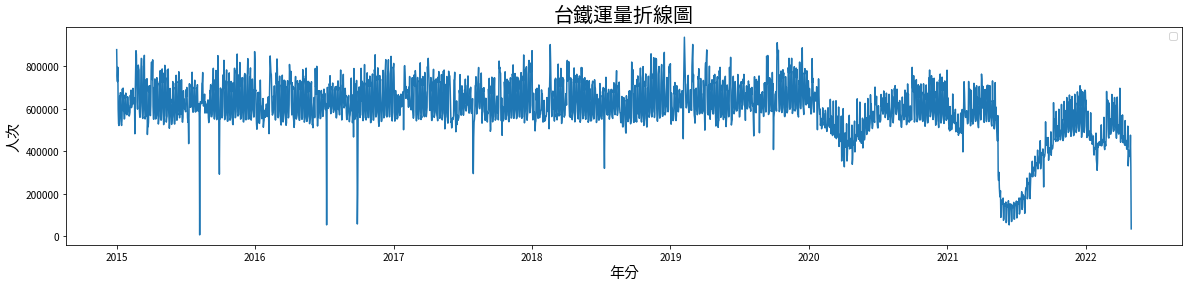

In [25]:
df_all = pd.read_excel( 'ANOVA_df.xlsx' )
df_all = df_all[df_all['year'] > 2014]
ty = df_all[df_all['is_typhoon'] == True]

fig, ax = plt.subplots( figsize = ( 20, 4 ) )
ax.plot( df_all['date'], df_all['trans_cnt'] )
plt.title( '台鐵運量折線圖', fontsize = 20 )
# ax.scatter( ty['date'], ty['trans_cnt'], c = 'r', label = '颱風' )
plt.xlabel( '年分', fontsize = 15 )
plt.ylabel( '人次', fontsize = 15 )
plt.legend()
plt.savefig( "images/TRA_history.jpg" )

## Metro

In [26]:
df_5_metro = df_all['metro_cnt']

In [27]:
df_5_metro = pd.concat( [df_5_metro, df_all['date']], axis = 1 )
df_5_metro = pd.concat( [df_5_metro, df_all['year']], axis = 1 )
df_5_metro = pd.concat( [df_5_metro, df_all['month']], axis = 1 )
df_5_metro = pd.concat( [df_5_metro, df_all['day']], axis = 1 )

In [28]:
dummy = pd.get_dummies( df_all['weekday'], prefix = 'weekday' )
df_5_metro = pd.concat( [df_5_metro, dummy], axis = 1 )
del df_5_metro["weekday_6"]

In [29]:
dummy = pd.get_dummies( df_all['belong'], prefix = 'belong' )
df_5_metro = pd.concat( [df_5_metro, dummy], axis = 1 )
del df_5_metro["belong_weekend"]

In [30]:
dummy = pd.get_dummies( df_all['phase'], prefix = 'phase' )
df_5_metro = pd.concat( [df_5_metro, dummy], axis = 1 )
del df_5_metro["phase_mid"]

In [31]:
df_5_metro = df_5_metro[df_5_metro['metro_cnt'] > 0]

In [32]:
df_5_metro_to_pre = df_5_metro[df_5_metro['year'] >= 2020]

In [33]:
df_5_metro = df_5_metro[df_5_metro['year'] < 2020]

In [34]:
y_data = df_5_metro.iloc[:,:1] # If yvalue is in the fisrt column
x_data = sm.add_constant( df_5_metro.iloc[:,2:] ) # If yvalue is in the fisrt column
olsmod = sm.OLS( y_data, x_data )
result_reg = olsmod.fit()
print( result_reg.summary() )

                            OLS Regression Results                            
Dep. Variable:              metro_cnt   R-squared:                       0.624
Model:                            OLS   Adj. R-squared:                  0.621
Method:                 Least Squares   F-statistic:                     200.2
Date:                Mon, 23 May 2022   Prob (F-statistic):               0.00
Time:                        13:43:39   Log-Likelihood:                -24513.
No. Observations:                1826   AIC:                         4.906e+04
Df Residuals:                    1810   BIC:                         4.915e+04
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const              -9.334e+07    5.5

In [35]:
pre = result_reg.predict( sm.add_constant( df_5_metro_to_pre.iloc[:,2:] ))
df_5_metro_to_pre = pd.concat( [df_5_metro_to_pre, pre], axis = 1, names = ['Predict'] )

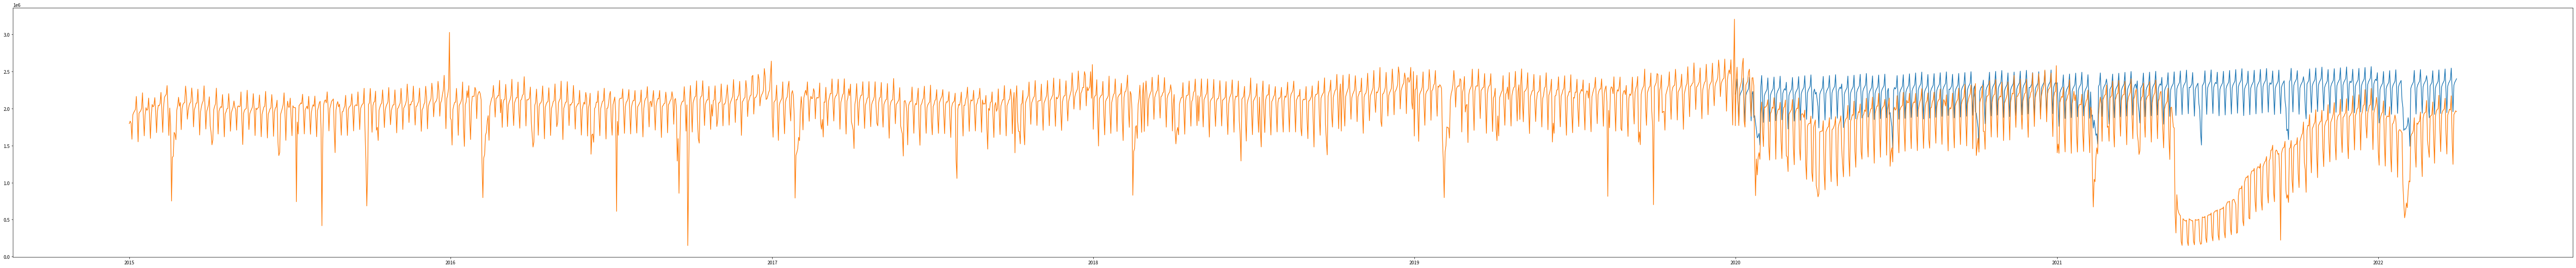

In [36]:
df_all_metro = df_all[df_all['metro_cnt']>0]
fig, ax = plt.subplots( figsize = ( 100, 10 ) )
plt.plot( df_5_metro_to_pre['date'], df_5_metro_to_pre.iloc[:,-1])
plt.plot( df_all_metro['date'], df_all_metro['metro_cnt'])
plt.savefig( 'temp.jpg')